In [96]:
# import modules

from pathlib import Path
from collections import Counter
from nltk.util import ngrams
from nltk.corpus import stopwords


import matplotlib.pyplot as plt

# data analysis and manipulation tool 
import pandas as pd
# natural language token analyzer package
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# define data location
data_dir = Path().resolve().parent / "data"

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maxhe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
# creating one big dataframe consisting of arguments labels and keypoints (only with true label)

# read data for training
df_arguments_train = pd.read_csv(data_dir / "arguments_train.csv",encoding="utf-8")
df_key_points_train = pd.read_csv(data_dir / "key_points_train.csv",encoding="utf-8")
df_key_points_train = df_key_points_train[['key_point','key_point_id']]
df_labels_train = pd.read_csv(data_dir / "labels_train.csv")

# merge labels with keypoints
df_labels_train=df_labels_train.merge(df_key_points_train,on='key_point_id')

# filter false labels
df_labels_train=df_labels_train[df_labels_train['label']!=0]

# merge labels with arguments
df_arguments_train=df_arguments_train.merge(df_labels_train,on='arg_id')
df_arguments_labels_key_points_train = df_arguments_train.copy()
df_arguments_labels_key_points_train


,arg_id,argument,topic,stance,key_point_id,label,key_point
0,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...
1,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1,kp_0_1,1,Assisted suicide reduces suffering
2,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...
3,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...
4,arg_0_5,a person should have the right to die on their...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...
...,...,...,...,...,...,...,...
4255,arg_27_215,We should subsidize vocational education becau...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...
4256,arg_27_218,we should subsidize vocational education to en...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...
4257,arg_27_219,We should subsidize vocational education to su...,We should subsidize vocational education,1,kp_27_6,1,vocational education better fits many students
4258,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1,kp_27_5,1,vocational education is a good career choice


In [98]:
# tokenizes the arguments and appends them to the unified data_frame
df_arguments_labels_key_points_train['argument_tokens'] = df_arguments_labels_key_points_train['argument'].apply(lambda row: nltk.regexp_tokenize(row, r'\w+'))

df_arguments_labels_key_points_train


,arg_id,argument,topic,stance,key_point_id,label,key_point,argument_tokens
0,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[A, patient, should, be, able, to, decide, whe..."
1,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1,kp_0_1,1,Assisted suicide reduces suffering,"[a, person, has, the, right, to, end, their, s..."
2,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, dignity, to, ch..."
3,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, right, to, be, ..."
4,arg_0_5,a person should have the right to die on their...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, right, to, die,..."
...,...,...,...,...,...,...,...,...
4255,arg_27_215,We should subsidize vocational education becau...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[We, should, subsidize, vocational, education,..."
4256,arg_27_218,we should subsidize vocational education to en...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[we, should, subsidize, vocational, education,..."
4257,arg_27_219,We should subsidize vocational education to su...,We should subsidize vocational education,1,kp_27_6,1,vocational education better fits many students,"[We, should, subsidize, vocational, education,..."
4258,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1,kp_27_5,1,vocational education is a good career choice,"[While, many, who, graduate, from, universitie..."


In [99]:
# tokenizes the keypoints and appends them to the unified data_frame
df_arguments_labels_key_points_train['key_point_tokens'] = df_arguments_labels_key_points_train['key_point'].apply(lambda row: nltk.regexp_tokenize(row, r'\w+'))

df_arguments_labels_key_points_train

,arg_id,argument,topic,stance,key_point_id,label,key_point,argument_tokens,key_point_tokens
0,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[A, patient, should, be, able, to, decide, whe...","[People, should, have, the, freedom, to, choos..."
1,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1,kp_0_1,1,Assisted suicide reduces suffering,"[a, person, has, the, right, to, end, their, s...","[Assisted, suicide, reduces, suffering]"
2,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, dignity, to, ch...","[People, should, have, the, freedom, to, choos..."
3,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, right, to, be, ...","[People, should, have, the, freedom, to, choos..."
4,arg_0_5,a person should have the right to die on their...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[a, person, should, have, the, right, to, die,...","[People, should, have, the, freedom, to, choos..."
...,...,...,...,...,...,...,...,...,...
4255,arg_27_215,We should subsidize vocational education becau...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[We, should, subsidize, vocational, education,...","[vocational, education, is, beneficial, for, t..."
4256,arg_27_218,we should subsidize vocational education to en...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[we, should, subsidize, vocational, education,...","[vocational, education, is, beneficial, for, t..."
4257,arg_27_219,We should subsidize vocational education to su...,We should subsidize vocational education,1,kp_27_6,1,vocational education better fits many students,"[We, should, subsidize, vocational, education,...","[vocational, education, better, fits, many, st..."
4258,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1,kp_27_5,1,vocational education is a good career choice,"[While, many, who, graduate, from, universitie...","[vocational, education, is, a, good, career, c..."


In [100]:
# visualize most common tokens

import numpy as np
def visualize_word_frequency(df_arguments,top_k=50,token_kind='argument_tokens'):
    fig,ax=plt.subplots(figsize=(8,6))
    c=Counter()
    for _,argument in df_arguments.iterrows():
        c.update(argument[token_kind])


    values,counts=zip(*c.most_common(top_k))    
    plt.bar(values,counts)

    plt.xticks(rotation=90)
    plt.show()
    return values

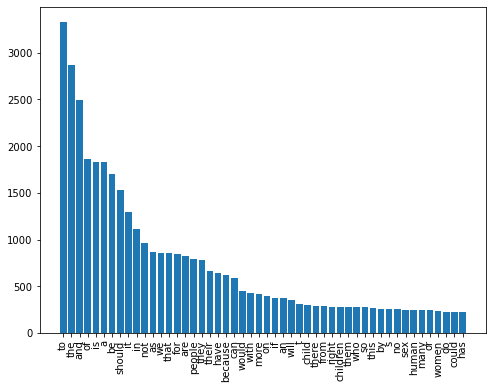

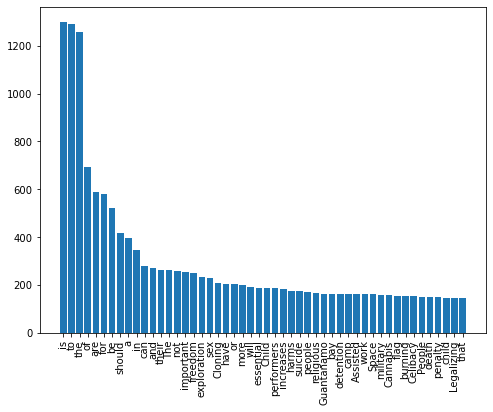

In [101]:
# most common tokens in arguments and keypoints with stopwords
argument_words=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_tokens')
key_point_words=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_tokens')

In [102]:
# remove stopwords
stopword = set(stopwords.words('english'))
df_arguments_labels_key_points_train['argument_tokens'] = df_arguments_labels_key_points_train['argument_tokens'].apply(lambda tokens: [token for token in tokens if token not in stopword])

df_arguments_labels_key_points_train['key_point_tokens'] = df_arguments_labels_key_points_train['key_point_tokens'].apply(lambda tokens: [token for token in tokens if token not in stopword])


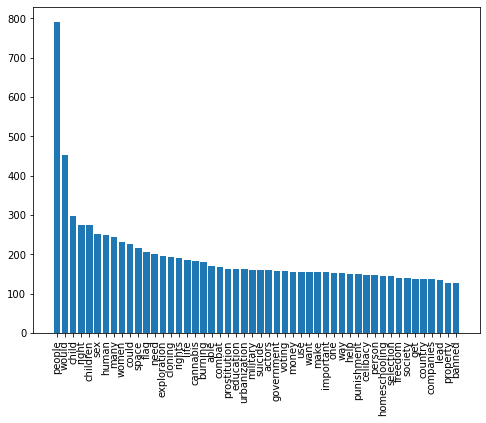

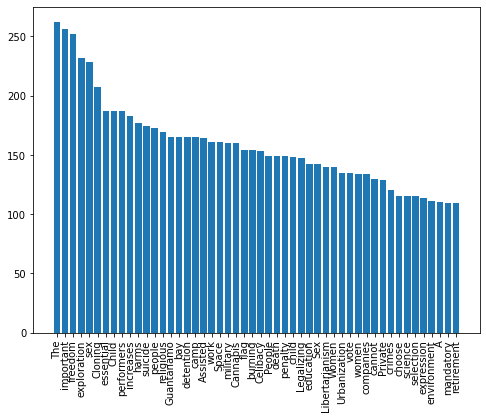

In [103]:
# most common tokens in arguments and keypoints without stopwords
argument_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'argument_tokens')
argument_words_without_stopwords=visualize_word_frequency(df_arguments_labels_key_points_train,50,'key_point_tokens')

In [104]:
# generates 3_grams for arguments
df_arguments_labels_key_points_train['argument_3_grams'] = df_arguments_labels_key_points_train['argument_tokens'].apply(lambda row: list(ngrams(row,3)))

df_arguments_labels_key_points_train

,arg_id,argument,topic,stance,key_point_id,label,key_point,argument_tokens,key_point_tokens,argument_3_grams
0,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[A, patient, able, decide, enough, care]","[People, freedom, choose, end, life]","[(A, patient, able), (patient, able, decide), ..."
1,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1,kp_0_1,1,Assisted suicide reduces suffering,"[person, right, end, suffering, somebody, take...","[Assisted, suicide, reduces, suffering]","[(person, right, end), (right, end, suffering)..."
2,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[person, dignity, choose, die]","[People, freedom, choose, end, life]","[(person, dignity, choose), (dignity, choose, ..."
3,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[person, right, able, choose, want, live, die]","[People, freedom, choose, end, life]","[(person, right, able), (right, able, choose),..."
4,arg_0_5,a person should have the right to die on their...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[person, right, die, terms]","[People, freedom, choose, end, life]","[(person, right, die), (right, die, terms)]"
...,...,...,...,...,...,...,...,...,...,...
4255,arg_27_215,We should subsidize vocational education becau...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[We, subsidize, vocational, education, skills,...","[vocational, education, beneficial, entire, ma...","[(We, subsidize, vocational), (subsidize, voca..."
4256,arg_27_218,we should subsidize vocational education to en...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[subsidize, vocational, education, entice, peo...","[vocational, education, beneficial, entire, ma...","[(subsidize, vocational, education), (vocation..."
4257,arg_27_219,We should subsidize vocational education to su...,We should subsidize vocational education,1,kp_27_6,1,vocational education better fits many students,"[We, subsidize, vocational, education, support...","[vocational, education, better, fits, many, st...","[(We, subsidize, vocational), (subsidize, voca..."
4258,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1,kp_27_5,1,vocational education is a good career choice,"[While, many, graduate, universities, struggle...","[vocational, education, good, career, choice]","[(While, many, graduate), (many, graduate, uni..."


In [105]:
# generates 3_grams for key_points
df_arguments_labels_key_points_train['key_point_3_grams'] = df_arguments_labels_key_points_train['key_point_tokens'].apply(lambda row: list(ngrams(row,3)))

df_arguments_labels_key_points_train

,arg_id,argument,topic,stance,key_point_id,label,key_point,argument_tokens,key_point_tokens,argument_3_grams,key_point_3_grams
0,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[A, patient, able, decide, enough, care]","[People, freedom, choose, end, life]","[(A, patient, able), (patient, able, decide), ...","[(People, freedom, choose), (freedom, choose, ..."
1,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1,kp_0_1,1,Assisted suicide reduces suffering,"[person, right, end, suffering, somebody, take...","[Assisted, suicide, reduces, suffering]","[(person, right, end), (right, end, suffering)...","[(Assisted, suicide, reduces), (suicide, reduc..."
2,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[person, dignity, choose, die]","[People, freedom, choose, end, life]","[(person, dignity, choose), (dignity, choose, ...","[(People, freedom, choose), (freedom, choose, ..."
3,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[person, right, able, choose, want, live, die]","[People, freedom, choose, end, life]","[(person, right, able), (right, able, choose),...","[(People, freedom, choose), (freedom, choose, ..."
4,arg_0_5,a person should have the right to die on their...,Assisted suicide should be a criminal offence,-1,kp_0_2,1,People should have the freedom to choose to en...,"[person, right, die, terms]","[People, freedom, choose, end, life]","[(person, right, die), (right, die, terms)]","[(People, freedom, choose), (freedom, choose, ..."
...,...,...,...,...,...,...,...,...,...,...,...
4255,arg_27_215,We should subsidize vocational education becau...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[We, subsidize, vocational, education, skills,...","[vocational, education, beneficial, entire, ma...","[(We, subsidize, vocational), (subsidize, voca...","[(vocational, education, beneficial), (educati..."
4256,arg_27_218,we should subsidize vocational education to en...,We should subsidize vocational education,1,kp_27_7,1,vocational education is beneficial for the ent...,"[subsidize, vocational, education, entice, peo...","[vocational, education, beneficial, entire, ma...","[(subsidize, vocational, education), (vocation...","[(vocational, education, beneficial), (educati..."
4257,arg_27_219,We should subsidize vocational education to su...,We should subsidize vocational education,1,kp_27_6,1,vocational education better fits many students,"[We, subsidize, vocational, education, support...","[vocational, education, better, fits, many, st...","[(We, subsidize, vocational), (subsidize, voca...","[(vocational, education, better), (education, ..."
4258,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1,kp_27_5,1,vocational education is a good career choice,"[While, many, graduate, universities, struggle...","[vocational, education, good, career, choice]","[(While, many, graduate), (many, graduate, uni...","[(vocational, education, good), (education, go..."


In [36]:
# labels_dev = pandas.read_csv(data_dir / "labels_dev.csv")
# labels_dev

In [37]:
# labels_train = pandas.read_csv(data_dir / "labels_train.csv")
# labels_train